# Lending Club Case Study - Sreekumar N.P.

Problem Statement :
Lending Club requires me to analyze all patterns and dependencies of the Loan defaulters and provide them with recommendations to identify such applicants.

In [1]:
#import the libraries
import pandas as pd,numpy as np
import warnings
warnings.filterwarnings("ignore")
#import the plotting libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Data Understanding

In [2]:
#read the dataset and check the first five rows
df1=pd.read_csv("loan.csv")
df1.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [3]:
#Check the shape of the dataframe
df1.shape


(39717, 111)

In [4]:
#Check the information related to the dataframe
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [5]:
#Check statistical information of the dataframe
df1.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


# Inference from the data above : Seems there is large amount of valid data, hence requires detailed checks for data cleaning

In [6]:
##Check the datatypes of all the columns of the dataframe
df1.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object

In [7]:
df1.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

# Seems there are few columns which only contains null values in its rows e.g. 39717 rows having null values out of Total rows = 39717. Take action to delete those Columns which only contains null values in its rows.

In [8]:
#Find columns having null values
df1.isnull().all().sum()

54

In [9]:
#Find columns with all null values and display it before making a decision to drop them
df1_null=df1.loc[:,df1.isnull().all()]
df1_null.dtypes

mths_since_last_major_derog       float64
annual_inc_joint                  float64
dti_joint                         float64
verification_status_joint         float64
tot_coll_amt                      float64
tot_cur_bal                       float64
open_acc_6m                       float64
open_il_6m                        float64
open_il_12m                       float64
open_il_24m                       float64
mths_since_rcnt_il                float64
total_bal_il                      float64
il_util                           float64
open_rv_12m                       float64
open_rv_24m                       float64
max_bal_bc                        float64
all_util                          float64
total_rev_hi_lim                  float64
inq_fi                            float64
total_cu_tl                       float64
inq_last_12m                      float64
acc_open_past_24mths              float64
avg_cur_bal                       float64
bc_open_to_buy                    

In [10]:
#dropping columns with all null
df1=df1.dropna(axis=1,how='all')

In [11]:
#Check if the Coulmns with all null values in their rows are deleted.
df1.isnull().all().sum()


0

In [12]:
#Find rows having null values
df1.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

 # Inference from the data above : There seems to be some more columns with more Null data in their rows.Note1 : mths_since_last_record ,next_pymnt_d has more than 90% of Null data, better to remove them.Note2:mths_since_last_delinq seems interesting from domain knowledge gained, that it conveys positive prospects until that month , but could be potential defaulters afterwards. I feel not to delete them and analyze in detail if required.

In [13]:
#Delete Columns : mths_since_last_record ,mths_since_last_delinq
df1 = df1.drop(columns = ['mths_since_last_record' ,'next_pymnt_d'])

In [14]:
#Find rows having null values
df1.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

In [15]:
#Analyze the Tatget variable : loan_status to identify any irrelevant rows
df1.loan_status.isnull().sum()


0

In [16]:
df1.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [17]:
#Find the data type of columns
df1.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
term                           object
int_rate                       object
installment                   float64
grade                          object
sub_grade                      object
emp_title                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                        object
loan_status                    object
pymnt_plan                     object
url                            object
desc                           object
purpose                        object
title                          object
zip_code                       object
addr_state                     object
dti                           float64
delinq_2yrs                     int64
earliest_cr_

In [18]:
#important
#As anaysis is on finding the factors that contribute for chargeoff, details related to 'Current' are irrelevant.
#So dropping them
df1 = df1.drop(df1[df1.loan_status == 'Current'].index)
df1.shape

(38577, 55)

In [19]:
# interst rate dtype needs to be converted to a quantitative value for easy analysis.
df1.int_rate=df1.int_rate.str.replace('%','')
df1.int_rate.value_counts()
df1.int_rate=df1.int_rate.astype("float")
df1.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90,156.46,A,A4,...,161.03,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [20]:
#Check and ensure that int_rate is changed to float64
df1.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
term                           object
int_rate                      float64
installment                   float64
grade                          object
sub_grade                      object
emp_title                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                        object
loan_status                    object
pymnt_plan                     object
url                            object
desc                           object
purpose                        object
title                          object
zip_code                       object
addr_state                     object
dti                           float64
delinq_2yrs                     int64
earliest_cr_

In [21]:
df1.dti.isnull().sum()

0

In [22]:
df1.emp_length.isnull().sum()

1033

In [23]:
df1.emp_length.value_counts()

10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

In [24]:
df1.emp_length.fillna(0,inplace = True)
df1.emp_length.isnull().sum()

0

# Note : At the beginning it was (39717, 111). After data cleaning of missing values and redundant columns, The remaining rows are 38577 and columns are 55.

# Data Cleaning phase is complete

# Start to perform Data Analysis

# From further investigation to gain domain experience the important variables identified are: 
1. Annual Income 
2. Loan Amount
3. Term
4. Grade
5. SubGrade
6. Loan Amount
7. Purpose of loan
8. DTI
9. Emp_length
10. Loan Date
11. Hpme Ownership
12. Verification_Status

There are customer behavioral variables present in the dataset, but that won't be available at the time of loan application hence can be ignored.


In [25]:
df1.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
term                           object
int_rate                      float64
installment                   float64
grade                          object
sub_grade                      object
emp_title                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                        object
loan_status                    object
pymnt_plan                     object
url                            object
desc                           object
purpose                        object
title                          object
zip_code                       object
addr_state                     object
dti                           float64
delinq_2yrs                     int64
earliest_cr_

# Quantitative Variables - Univariate Analysis

In [26]:
df1.annual_inc.describe()

count    3.857700e+04
mean     6.877797e+04
std      6.421868e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.886800e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

<AxesSubplot:>

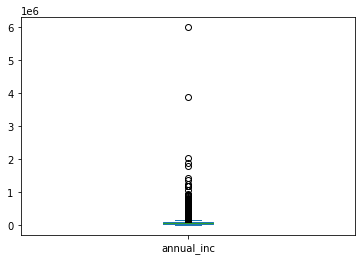

In [27]:
df1.annual_inc.plot.box()

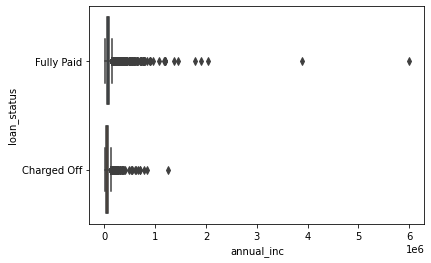

In [28]:
sns.boxplot(df1.annual_inc,df1.loan_status)
plt.show()

In [29]:
df1 = df1[df1.annual_inc < 1000000]

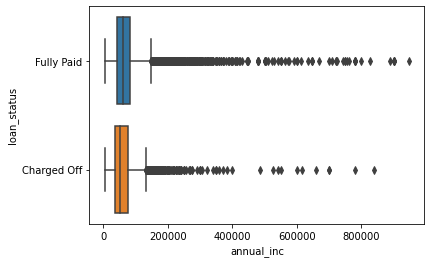

In [30]:
sns.boxplot(df1.annual_inc,df1.loan_status)
plt.show()

In [31]:
df2 = df1[(df1.annual_inc <10000000) & (df1.loan_status == 'Charged Off')]
df2.head()
df2.describe()


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
count,5.626000e+03,5.626000e+03,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000,...,5626.000000,5626.000000,5626.000000,5620.0,5626.0,5626.0,5620.0,5626.0,5508.000000,5625.0
mean,6.978205e+05,8.677217e+05,12103.732670,11752.683967,10863.652949,13.820579,336.170976,62216.211525,13.999236,0.170636,...,672.217754,87.580860,326.014998,0.0,1.0,0.0,0.0,0.0,0.067175,0.0
std,2.163887e+05,2.723416e+05,8086.302606,7761.020860,7662.154617,3.654721,217.070923,45079.747234,6.585339,0.535029,...,1720.873939,386.623347,529.029889,0.0,0.0,0.0,0.0,0.0,0.251794,0.0
min,6.141900e+04,8.035300e+04,900.000000,900.000000,0.000000,5.420000,22.790000,4080.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
25%,5.297122e+05,6.848970e+05,5600.000000,5562.500000,5000.000000,11.295000,168.522500,37000.000000,9.050000,0.000000,...,0.000000,0.000000,112.827500,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
50%,6.969170e+05,8.881330e+05,10000.000000,10000.000000,9400.605813,13.610000,293.870000,53000.000000,14.290000,0.000000,...,173.050000,2.511600,238.200000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
75%,8.548820e+05,1.066599e+06,16500.000000,16000.000000,15000.000000,16.400000,457.925000,75000.000000,19.290000,0.000000,...,595.767500,9.372500,405.887500,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
max,1.077430e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,24.400000,1305.190000,840000.000000,29.850000,8.000000,...,29623.350000,7002.190000,12818.380000,0.0,1.0,0.0,0.0,0.0,2.000000,0.0


# Inference from the data above : The charged Off maximum annual income is 840000. We can remove the outliers of annual income above it.

In [32]:
df1 = df1[df1.annual_inc <= 840000]

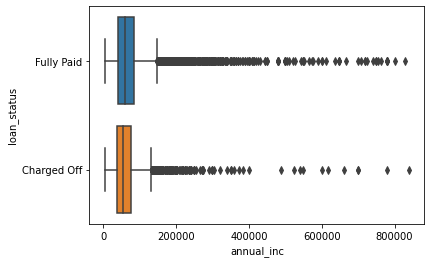

In [33]:
sns.boxplot(df1.annual_inc,df1.loan_status)
plt.show()

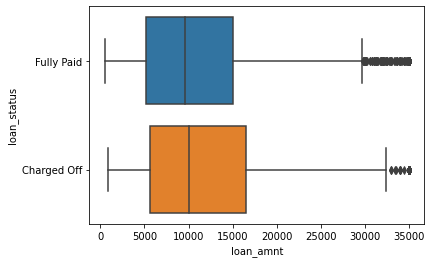

In [34]:
sns.boxplot(df1.loan_amnt,df1.loan_status)
plt.show()

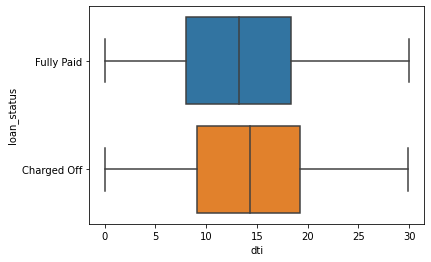

In [35]:
sns.boxplot(df1.dti,df1.loan_status)
plt.show()

# Bivariate analysis

<AxesSubplot:xlabel='loan_status'>

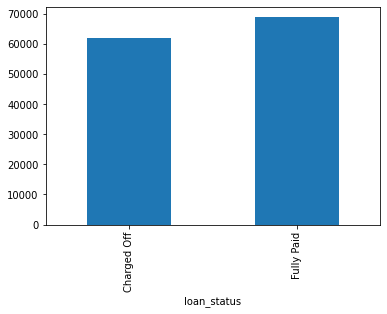

In [43]:
df1.groupby(['loan_status'])['annual_inc'].mean().plot.bar()
#dont make sense could be outliers in annual inc so mean

<AxesSubplot:xlabel='loan_status'>

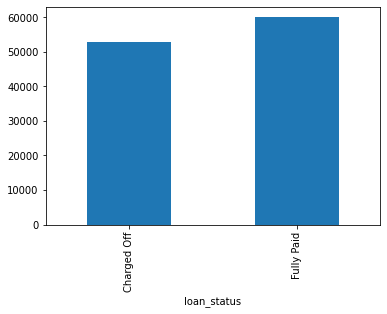

In [44]:
df1.groupby(['loan_status'])['annual_inc'].median().plot.bar()

# Inference from the data above : There is not much to infer from the mean and median bar plots, hence it would require the process of binning and further analysis

In [46]:
df1['incomeRange']=pd.qcut(df1.annual_inc,[0,0.33,0.66,1],["L","M","H"])

In [48]:
df1.incomeRange.value_counts()

M    12959
L    12806
H    12792
Name: incomeRange, dtype: int64

In [57]:
#loan_status of different incomegroup over median loan amount
#res=pd.pivot_table(data=df1,index="loan_status",columns ="incomeRange",values="loan_amnt",aggfunc=lambda x: np.quantile(x,0.5))
res=pd.pivot_table(data=df1,index="loan_status",columns ="incomeRange",values="loan_amnt",aggfunc=sum)

<AxesSubplot:xlabel='incomeRange', ylabel='loan_status'>

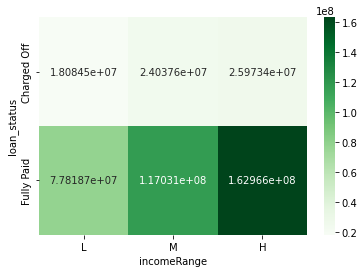

In [58]:
##Apply customisations
sns.heatmap(res,cmap="Greens",annot=True,fmt='g')

# Inference from the data above : The Total amount Charged Off is higher for medium income and higher income than the Lower income range people.


In [ ]:
#loan_status of different incomegroup over median loan amount
dfAnPurpose=df1[['purpose','incomeRange','loan_amnt']]
sns.countplot(x="incomeRange",data=dfAnPurpose)

In [ ]:
#loan_status for different purpose over median loan amount
resp=pd.pivot_table(data=df1,index="purpose",columns ="loan_status",values="loan_amnt",aggfunc=lambda x: np.quantile(x,0.5))

In [ ]:
sns.heatmap(resp,cmap="Greens",annot=True,fmt='g')

In [ ]:
#important
# The loan_amount taken for creditcard,debt_consolidation,small_business are among the top defaulted ones


In [ ]:
resa=pd.pivot_table(data=df1,index="purpose",columns ="incomeRange",values="loan_amnt",aggfunc=lambda x: np.quantile(x,0.5))

In [ ]:
sns.heatmap(resa,cmap="Greens",annot=True,fmt='g')

In [ ]:
dfannual=df1[['purpose','incomeRange']]
resannual=pd.pivot_table(data=dfannual,index="purpose",columns ="incomeRange",aggfunc=len)
resannual.head()


In [ ]:
resannual.plot(kind="bar")
plt.show()

In [ ]:
#important
#Moderate income group applies more loan mostly for debt_consolidation

In [ ]:
dfannualdefault=df1[['purpose','incomeRange','loan_status']]
dfannualdefault=dfannualdefault[dfannualdefault['loan_status']=='Charged Off']
dfannualdefault.head()
resannualdef=pd.pivot_table(data=dfannualdefault,index=["purpose","loan_status"],columns ="incomeRange",aggfunc=len)
resannualdef.head()

In [ ]:
resannualdef['sum']=resannualdef['L']+resannualdef['M']+resannualdef['H']
resannualdef['lper']=(resannualdef['L']/resannualdef['sum'])*100
resannualdef['mper']=(resannualdef['M']/resannualdef['sum'])*100
resannualdef['hper']=(resannualdef['H']/resannualdef['sum'])*100
resannualdef.head()


In [ ]:
resannualdef.tail()

In [ ]:
resannualdefper=resannualdef[['lper','mper','hper']]
resannualdefper.plot(kind="bar")

In [ ]:
#important
#On percentage analysis,Low income group creates more charge_offs when they apply for educational,moving,renewableenergy loans.

In [ ]:
dfannualpaid=df1[['purpose','incomeRange','loan_status']]
dfannualpaid=dfannualpaid[dfannualpaid['loan_status']=='Fully Paid']
dfannualpaid.head()
resannualpaid=pd.pivot_table(data=dfannualpaid,index=["purpose","loan_status"],columns ="incomeRange",aggfunc=len)
resannualpaid.head()

In [ ]:
resannualpaid['sum']=resannualpaid['L']+resannualpaid['M']+resannualpaid['H']
resannualpaid['lper']=(resannualpaid['L']/resannualpaid['sum'])*100
resannualpaid['mper']=(resannualpaid['M']/resannualpaid['sum'])*100
resannualpaid['hper']=(resannualpaid['H']/resannualpaid['sum'])*100
resannualpaid.head()

In [ ]:
resannualpaidper=resannualpaid[['lper','mper','hper']]
resannualpaidper.plot(kind="bar")

In [ ]:
#important
#Medium income group fully pays debtconsolidation loans.But Low income makes chargeoffs
#Low income group is highest in paying educational loans fully but they are also high in making chargedoffs in the same category

In [ ]:
df1.groupby(['purpose'])['loan_status'].value_counts().plot.bar()
#The largest number of loan is taken for debt_consolidation

In [ ]:
df1.dtypes

In [ ]:
dfdelinq=df1[['id','loan_amnt','loan_status','delinq_2yrs','mths_since_last_delinq','acc_now_delinq','chargeoff_within_12_mths','incomeRange','delinq_amnt','grade']]
dfdelinq.head()

In [ ]:
sns.barplot(data=dfdelinq,x='grade',y='mths_since_last_delinq',estimator =np.median)
plt.show()

In [ ]:
dfdelinq.dtypes

In [ ]:
dfdelinq.mths_since_last_delinq.value_counts()

In [ ]:
dfdelinq.delinq_2yrs.value_counts()

In [ ]:
dfdelinq.acc_now_delinq.value_counts()

In [ ]:
dfdelinq.mths_since_last_delinq.isnull().sum()

In [ ]:
dfdelinq=dfdelinq[~dfdelinq.mths_since_last_delinq.isnull()]
dfdelinq.dtypes

In [ ]:
dfdelinq.grade.value_counts()

In [ ]:
sns.barplot(data=dfdelinq,x='grade',y='mths_since_last_delinq',estimator =np.median)
plt.show()

In [ ]:
#People in low risk A,B,C,D does not have much delinques in last months.Their mths_since_last_delinq tend to be higher

In [ ]:
df1.groupby(['grade'])['loan_status'].count().plot.bar()

In [ ]:
dfrisk=df1[['grade','loan_status']]
resrisk=pd.pivot_table(data=dfrisk,index="grade",columns ="loan_status",aggfunc=len)


In [ ]:
resrisk.plot(kind="bar")
plt.show()

In [ ]:
#important
#Chance of getting loan of high risk group is minimal. 'A' grade loans represent the lowest risk while 'G' grade loans are the riskiest.

In [ ]:
df1.groupby(['grade'])['loan_amnt'].median().plot.bar()

In [ ]:
#importaant
#The median amount of loan taken by high risk group will be higher

In [ ]:
sns.barplot(data=df1,x='grade',y='loan_amnt',estimator =np.min)
plt.show()

In [ ]:
resg=pd.pivot_table(data=df1,index="purpose",columns ="grade",values="loan_amnt",aggfunc=lambda x: np.quantile(x,0.5))

In [ ]:
sns.heatmap(resg,cmap="Greens",annot=True,fmt='g')

In [ ]:
#important
#High risk group needs loan more for credit_Card,medical,home_improvement purposes

In [ ]:
dfriskdefault=df1[['grade','incomeRange','loan_status']]
dfriskdefault=dfriskdefault[dfriskdefault['loan_status']=='Charged Off']
dfriskdefault.head()


In [ ]:
resriskdft=pd.pivot_table(data=dfriskdefault,index=['grade'],columns =["loan_status",'incomeRange'],aggfunc=len)


In [ ]:
resriskdft.head()

In [ ]:
resriskdft.plot(kind='bar')

In [ ]:
#important this shows largest number of chargeoff occured in risk group 'B'.But the truth is the number of total loans in RiskGroup B also will be higher.so we have to take percentage

In [ ]:
resrisk["Total"]=resrisk["Charged Off"]++resrisk["Fully Paid"]
resrisk["perOff"]=(resrisk["Charged Off"]/resrisk["Total"])*100
resrisk.head()
plotrisk=resrisk[['perOff']]
plotrisk.head()

In [ ]:
plotrisk.plot(kind="bar")
plt.show()

In [ ]:
#important 
#The percentage of chargeoff increases with risk

In [ ]:
#years in employment



In [ ]:
df1.dtypes

In [ ]:
df1.term.value_counts()

In [ ]:
df1.term.isnull().sum()

In [ ]:
dfempl=df1[['emp_length','term']]
resempl=pd.pivot_table(data=dfempl,index=['emp_length'],columns =['term'],aggfunc=len)


In [ ]:
resempl.head()

In [ ]:
resempl.plot(kind="bar")

In [ ]:
#important
#short term loans are mostly requested among all employee groups

In [ ]:
dfemplgrade=df1[['grade','term']]
resemplg=pd.pivot_table(data=dfemplgrade,index=['grade'],columns =['term'],aggfunc=len)
resemplg.head()

In [ ]:
resemplg.plot(kind="bar")

In [ ]:
#important
#Short term loans are mostly preferred over long term with people with good credit score.

In [ ]:
plt.show()

In [ ]:
dfemplstat=df1[['emp_length','loan_status']]
#func = lambda x: 100*x.count()/dfemplstat.shape[0]
resemplstat=pd.pivot_table(data=dfemplstat,index=['emp_length'],columns =['loan_status'],aggfunc=len)


In [ ]:
resemplstat.head()


In [ ]:
resemplstat['Total']=resemplstat['Charged Off']+resemplstat['Fully Paid']
resemplstat['perOff']=resemplstat['Charged Off']/resemplstat['Total']*100
resemplstat.head()

In [ ]:
#important
#People with O employeement length have more percentage of chargeoff.

In [ ]:
resemplstatplt=resemplstat[['perOff']]
resemplstatplt.plot(kind="bar")


In [ ]:
#dti analysis
#A debt-to-income ratio (DTI) is a personal finance measure that compares the amount of debt you have to your overall income. Lenders, including issuers of mortgages, use it as a way to measure your ability to manage the payments you make each month and repay the money you have borrowed.
#Measuring dti against loan status
df1.dti.value_counts()

In [ ]:
df1.dti.isnull().sum()

In [ ]:
df1['dtiRange']=pd.qcut(df1.dti,[0,0.33,0.66,1],["L","M","H"])
df1[['dti','dtiRange']]

In [ ]:
dfdtRange=df1[['loan_status','dtiRange']]
dfdtRange.head()

In [ ]:
resdti=pd.pivot_table(data=dfdtRange,index=['dtiRange'],columns =['loan_status'],aggfunc=len)
resdti.head()

In [ ]:
resdti.plot(kind="bar")

In [ ]:
resdtplt = resdti[['Charged Off']]
resdtplt.plot(kind='bar')

In [ ]:
#important
#dtiRange high will make higher chargeOff

In [ ]:
#implementing with cut

In [ ]:
#checking qcut and cut
df1['dtibitRange'] =pd.cut(x=df1['dti'], bins=(0,10,30,45))
df1[['dti','dtiRange','dtibitRange']]

In [ ]:
dfdtRange1=df1[['loan_status','dtibitRange']]
dfdtRange1.head()

In [ ]:
dfdtRange1.dtibitRange.value_counts()

In [ ]:
resdti1=pd.pivot_table(data=dfdtRange1,index=['dtibitRange'],columns =['loan_status'],aggfunc=len)
resdti1.head()

In [ ]:
resdti1.plot(kind="bar")

In [ ]:
resdtplt1 = resdti1[['Charged Off']]
resdtplt1.plot(kind='bar')

In [ ]:
#important
#Chargeoffs are higher in high dti range

In [ ]:
#important 
#Checking whether int_rate hinders payment of lowincome group for educational purpose loans
dfLowIncome=df1[['incomeRange','loan_status','term','int_rate','grade','purpose']]
dfLowIncome.head()

In [ ]:
dfLowIncome=dfLowIncome[dfLowIncome.incomeRange =='L']
dfLowIncome=dfLowIncome[dfLowIncome.purpose =='educational']
dfLowIncome.head()

In [ ]:
dfLowIncome.int_rate.value_counts()
dfLowIncome.dtypes

In [ ]:
dfLowIncome.int_rate=dfLowIncome.int_rate.str.replace('%','')
dfLowIncome.int_rate.value_counts()

In [ ]:
dfLowIncome.isnull().sum()

In [ ]:
dfLowIncome['intRange']=pd.qcut(dfLowIncome.int_rate,[0,0.33,0.66,1],["L","M","H"])
dfLowIncome=dfLowIncome[['loan_status','term','intRange']]

In [ ]:
resLincome=pd.pivot_table(data=dfLowIncome,index=["loan_status","term"],columns =["intRange"],aggfunc=len)
resLincome.head()

In [ ]:
resLincome['Total']=resLincome['L']+resLincome['M']+resLincome['H']
resLincome['perL']=resLincome['L']/resLincome['Total']*100
resLincome['perM']=resLincome['M']/resLincome['Total']*100
resLincome['perH']=resLincome['H']/resLincome['Total']*100
resLincome.head()

In [ ]:
resIncPer=resLincome[['perL','perM','perH']]
#For low income group, the chargeoff will be higher in case of longterm

In [ ]:
resIncPer.head()

In [ ]:
resIncPer.plot(kind="bar")

In [ ]:
#important
#For education loans chargeoff occurs when interest rate is high and term is short in low income group
#If the term is long, high interest loans are also getting paid
